# Lending Club
## Exploratory Data Analysis and Segmenation

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats
import math

import os
print(os.getcwd())

c:\Users\haris\Desktop\GitHub_Projects\Statistics


## DataSource
https://www.kaggle.com/wordsforthewise/lending-club

In [36]:
loan_full_df = pd.read_csv('RawData/accepted_2007_to_2018Q4.csv')
loan_full_df.shape[0]

2260701

In [4]:
loan_full_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_full_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [6]:
loan_int_df = loan_full_df[loan_full_df['loan_status'] != 'Current']
loan_int_df = loan_int_df[loan_full_df['loan_status'] != 'Late (31-120 days)']
loan_int_df = loan_int_df[loan_full_df['loan_status'] != 'In Grace Period']
loan_int_df = loan_int_df[loan_full_df['loan_status'] != 'Late (16-30 days)']
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Charged Off', 'Default')
loan_int_df['loan_status'] = loan_int_df['loan_status'].replace('Fully Paid', 'Good')

In [7]:
loan_int_df['loan_status'].value_counts()

Good       1078739
Default     269360
Name: loan_status, dtype: int64

In [8]:
loan_int_df = loan_int_df.dropna(subset = ['fico_range_low', 'last_fico_range_low'])
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x: x['fico_range_low'] if x['last_fico_range_low']==0 else x['last_fico_range_low'],axis=1)
loan_int_df['loan_status'].value_counts()

Good       1078739
Default     269360
Name: loan_status, dtype: int64

In [9]:
loan_int_df['last_fico_range_low'].value_counts().sort_index()

500.0     7663
505.0     8268
510.0     9391
515.0     9483
520.0    10854
         ...  
825.0     3537
830.0     2123
835.0     1047
840.0      570
845.0      255
Name: last_fico_range_low, Length: 70, dtype: int64

In [10]:
pd.cut(loan_int_df['last_fico_range_low'], 5)

0          (499.655, 569.0]
1            (638.0, 707.0]
2            (638.0, 707.0]
4            (638.0, 707.0]
5            (707.0, 776.0]
                 ...       
2260688      (638.0, 707.0]
2260690      (707.0, 776.0]
2260691      (707.0, 776.0]
2260692      (638.0, 707.0]
2260697      (569.0, 638.0]
Name: last_fico_range_low, Length: 1348099, dtype: category
Categories (5, interval[float64]): [(499.655, 569.0] < (569.0, 638.0] < (638.0, 707.0] < (707.0, 776.0] < (776.0, 845.0]]

In [11]:
loan_int_df['fico_buckets'] = pd.cut(loan_int_df['last_fico_range_low'], 5, labels= ['High Risky', 'Risky', 'Low Risk', 'Good', 'Excellent'])
loan_int_df['fico_buckets'].value_counts()

Low Risk      487921
Good          411018
Risky         182481
High Risky    159864
Excellent     106815
Name: fico_buckets, dtype: int64

In [12]:
loan_status_df = loan_int_df[['loan_status', 'fico_buckets']].groupby(['loan_status', 'fico_buckets']).agg({'fico_buckets' : 'count'})
loan_status_df.rename({'fico_buckets' : 'count'}, axis='columns').reset_index()

,loan_status,fico_buckets,count
0,Default,High Risky,122708
1,Default,Risky,87836
2,Default,Low Risk,50520
3,Default,Good,7527
4,Default,Excellent,769
5,Good,High Risky,37156
6,Good,Risky,94645
7,Good,Low Risk,437401
8,Good,Good,403491
9,Good,Excellent,106046


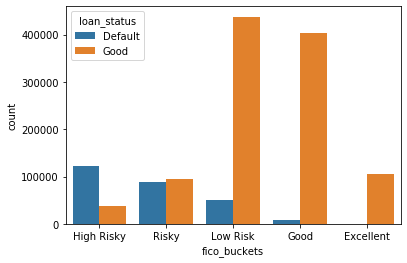

In [13]:
sns.barplot(x="fico_buckets", y="count", hue='loan_status', data=loan_status_df.rename({'fico_buckets': 'count'}, axis='columns').reset_index())

In [14]:
pd.qcut(loan_int_df['int_rate'], 5)

0          (13.98, 16.99]
1          (11.53, 13.98]
2            (8.9, 11.53]
4          (16.99, 30.99]
5          (11.53, 13.98]
                ...      
2260688      (8.9, 11.53]
2260690    (13.98, 16.99]
2260691    (13.98, 16.99]
2260692    (11.53, 13.98]
2260697    (13.98, 16.99]
Name: int_rate, Length: 1348099, dtype: category
Categories (5, interval[float64]): [(5.308999999999999, 8.9] < (8.9, 11.53] < (11.53, 13.98] < (13.98, 16.99] < (16.99, 30.99]]

In [15]:
loan_int_df['rate_buckets'] = pd.qcut(loan_int_df['int_rate'], 5, labels=['Low', 'Medium', 'High', 'Very High', 'ForgotIt'])
loan_int_df['rate_buckets'].value_counts()

Very High    274197
Medium       273140
Low          271521
High         264838
ForgotIt     264403
Name: rate_buckets, dtype: int64

In [16]:
loan_rate_df = loan_int_df[['loan_status', 'rate_buckets']].groupby(['loan_status', 'rate_buckets']).agg({'rate_buckets':'count'})
loan_rate_df.rename({'rate_buckets' : 'count'}, axis='columns').reset_index()

,loan_status,rate_buckets,count
0,Default,Low,18222
1,Default,Medium,37719
2,Default,High,49589
3,Default,Very High,68898
4,Default,ForgotIt,94932
5,Good,Low,253299
6,Good,Medium,235421
7,Good,High,215249
8,Good,Very High,205299
9,Good,ForgotIt,169471


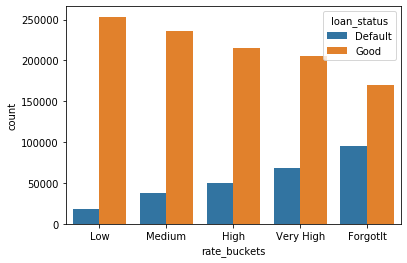

In [17]:
sns.barplot(x="rate_buckets", y = "count", hue = "loan_status", data=loan_rate_df.rename({'rate_buckets':'count'}, axis='columns').reset_index())

In [18]:
loan_int_df[['loan_status', 'rate_buckets', 'fico_buckets']].groupby(['fico_buckets', 'rate_buckets']).agg({'loan_status': 'count'})

loan_status
fico_buckets rate_buckets             
High Risky   Low                 10419
             Medium              23066
             High                31486
             Very High           41925
             ForgotIt            52968
Risky        Low                 15873
             Medium              29009
             High                37854
             Very High           46096
             ForgotIt            53649
Low Risk     Low                 68141
             Medium             101334
             High               104026
             Very High          109752
             ForgotIt           104668
Good         Low                122471
             Medium              98166
             High                77098
             Very High           66175
             ForgotIt            47108
Excellent    Low                 54617
             Medium              21565
             High                14374
             Very High           10249
             ForgotIt             6010

In [19]:
pd.crosstab(index= loan_int_df['fico_buckets'], columns=loan_int_df['rate_buckets'], margins=True)

rate_buckets,Low,Medium,High,Very High,ForgotIt,All
fico_buckets,,,,,,
High Risky,10419,23066,31486,41925,52968,159864
Risky,15873,29009,37854,46096,53649,182481
Low Risk,68141,101334,104026,109752,104668,487921
Good,122471,98166,77098,66175,47108,411018
Excellent,54617,21565,14374,10249,6010,106815
All,271521,273140,264838,274197,264403,1348099


In [20]:
pd.crosstab(index=loan_int_df['fico_buckets'], columns= loan_int_df['rate_buckets']).apply(lambda x: x/x.sum(), axis=1)

rate_buckets,Low,Medium,High,Very High,ForgotIt
fico_buckets,,,,,
High Risky,0.065174,0.144285,0.196955,0.262254,0.331332
Risky,0.086984,0.158970,0.207441,0.252607,0.293998
Low Risk,0.139656,0.207685,0.213203,0.224938,0.214518
Good,0.297970,0.238836,0.187578,0.161003,0.114613
Excellent,0.511323,0.201891,0.134569,0.095951,0.056266


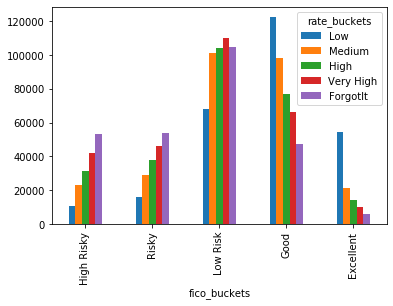

In [21]:
fico_rate_ct = pd.crosstab(index= loan_int_df['fico_buckets'], columns=loan_int_df['rate_buckets'])
fico_rate_ct.plot.bar()

In [22]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([fico_rate_ct.iloc[0].values, fico_rate_ct.iloc[1].values, fico_rate_ct.iloc[2].values, fico_rate_ct.iloc[3].values, fico_rate_ct.iloc[4].values])
V = np.sqrt(chi2/(fico_rate_ct.shape[0]))

print("chi2 :", chi2)
print("p-value :", p)
print("Degree for Freedom :", dof)
print("Carmer V Test: ", V)

chi2 : 180911.32321320334
p-value : 0.0
Degree for Freedom : 16
Carmer V Test:  190.21636271004834


In [23]:
loan_int_df['fico_score'] = loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(x/10))*10)
loan_int_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_buckets,rate_buckets,fico_score
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,N,NaN,NaN,NaN,NaN,NaN,NaN,High Risky,Very High,560
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk,High,700
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,N,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk,Medium,700
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,Low Risk,ForgotIt,700
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,N,NaN,NaN,NaN,NaN,NaN,NaN,Good,High,760


In [24]:
default_df = pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts())
default_df = default_df.reset_index()
default_df.columns = ['fico_score', 'default_total']
default_df

,fico_score,default_total
0,550,19710
1,540,19599
2,560,19007
3,570,17940
4,530,17844
5,520,16504
6,580,16433
7,590,14666
8,510,14624
9,600,12941


In [41]:
default_df[['fico_score', 'default_total']].corr()

,fico_score,default_total
fico_score,1.000000,-0.899864
default_total,-0.899864,1.000000


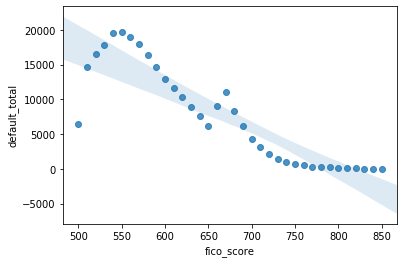

In [42]:
sns.regplot(x='fico_score', y='default_total', data=default_df)

In [43]:
default_df[['fico_score','default_total']].corr('spearman')

,fico_score,default_total
fico_score,1.00000,-0.93565
default_total,-0.93565,1.00000
